# PREPROCESSING

In [74]:
import pandas as pd 

In [75]:
import nltk

In [76]:
df = pd.read_csv('../raw_data/news_all.csv')

In [77]:
df.head()

,Text,Label
0,Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center,2
1,"GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018",2
2,"CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments",0
3,"Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP",0
4,"3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020",1


In [78]:
df.shape

(11656, 2)

In [79]:
df['Label'].value_counts()

Label
1    8077
2    2033
0    1546
Name: count, dtype: int64

In [80]:
df.iloc[0]

Text     Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center
Label                                                                                   2
Name: 0, dtype: object

In [81]:
for i in range(5):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

Data: Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center
Label: 2


Data: GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018
Label: 2


Data: CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments
Label: 0


Data: Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP
Label: 0


Data: 3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020
Label: 1




In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11656 non-null  object
 1   Label   11656 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 182.3+ KB


In [83]:
import re

In [84]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [85]:
def clean_text(text):

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)

    return cleaned_text

In [86]:
clean_text('WELCOME to this practical skills module!!')

'welcome practical skills module'

In [87]:
df['Cleaned Text'] = df['Text'].apply(clean_text)

In [88]:
df

,Text,Label,Cleaned Text
0,Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center,2,amazon create 500 new jobs mississippi builds new fulfillment center
1,"GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018",2,ges stock rises 1 premarket set trade 13 1st time regularsession hours since october 2018
2,"CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments",0,cn rail strike begins threatening canada oil grain shipments
3,"Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP",0,hong kong airlines cut 400 jobs ask employees take unpaid leave scmp
4,"3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020",1,3 topperforming mutual funds consider retirement portfolio february 07 2020
...,...,...,...
11651,"A record 449,553 Illinois residents sign up for Affordable Care Act insurance, amid uncertainty over future",1,record 449553 illinois residents sign affordable care act insurance amid uncertainty future
11652,The Los Angeles Fires Will Put California’s New Insurance Rules to the Test,1,los angeles fires put californias new insurance rules test
11653,"NexPoint Real Estate Finance, Inc. Enters into Assignment Agreement with The Ohio State Life Insurance Company",1,nexpoint real estate finance inc enters assignment agreement ohio state life insurance company
11654,"AO Buzzard Agency Introduces Financial Services with Transparent, Lifetime-Coverage Insurance Solutions",1,ao buzzard agency introduces financial services transparent lifetimecoverage insurance solutions


In [89]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [90]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

In [91]:
news_1 = "Hong Kong stocks increased 4% as China relaxes virus rules"
news_2 = "Novo Nordisk stock increased by 2% in today's trading session"
news_3 = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"

In [92]:
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


In [93]:
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


In [94]:
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


In [95]:
print(encoded_news_1)
len(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


14

In [96]:
print(encoded_news_2)
len(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


16

In [97]:
print(encoded_news_3)
len(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


19

In [98]:
import torch
from torch.nn.utils.rnn import pad_sequence

In [99]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

def tokenization_padding(df):
    # 使用 tokenizer 批量处理文本，返回 `input_ids` 和 `attention_mask`
    encoded_inputs = tokenizer(
        df["Cleaned Text"].tolist(), 
        truncation=True,         # 截断到最大长度
        padding="max_length",            # 自动填充
        max_length=512,          # FinBERT 最大支持 512 tokens
        return_tensors="pt",     # 返回 PyTorch 张量
        return_attention_mask=True  # 生成 attention mask
    )

    df["Encoded Text"] = encoded_inputs["input_ids"].tolist()  # 转换为列表存入 DataFrame
    df["Attention Mask"] = encoded_inputs["attention_mask"].tolist()  # 存 attention_mask
    
    return encoded_inputs["input_ids"], encoded_inputs["attention_mask"]


In [100]:
X, attention_mask = tokenization_padding(df)
X

tensor([[  101,  9733,  3443,  ...,     0,     0,     0],
        [  101, 16216,  2015,  ...,     0,     0,     0],
        [  101, 27166,  4334,  ...,     0,     0,     0],
        ...,
        [  101, 11265,  2595,  ...,     0,     0,     0],
        [  101, 20118, 12610,  ...,     0,     0,     0],
        [  101,  3534, 28619,  ...,     0,     0,     0]])

In [101]:
X.shape

torch.Size([11656, 512])

In [102]:
# Let's define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [103]:
X = tokenization_padding(df)
X

array([[  101,  9733,  3443, ...,     0,     0,     0],
       [  101, 16216,  2015, ...,     0,     0,     0],
       [  101, 27166,  4334, ...,     0,     0,     0],
       ...,
       [  101, 11265,  2595, ...,     0,     0,     0],
       [  101, 20118, 12610, ...,     0,     0,     0],
       [  101,  3534, 28619, ...,     0,     0,     0]])

In [104]:
# X, attention_mask = tokenization_padding(df)  # 确保这里是正确的
# print(f"X shape: {X.shape}, attention_mask shape: {attention_mask.shape}")

In [105]:
df

,Text,Label,Cleaned Text,Encoded Text,Attention Mask
0,Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center,2,amazon create 500 new jobs mississippi builds new fulfillment center,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 16473, 2047, 29362, 2415, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,"GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018",2,ges stock rises 1 premarket set trade 13 1st time regularsession hours since october 2018,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17007, 3388, 2275, 3119, 2410, 3083, 2051, 24945, 7971, 3258, 2847, 2144, 2255, 2760, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,"CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments",0,cn rail strike begins threatening canada oil grain shipments,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 3514, 8982, 24636, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,"Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP",0,hong kong airlines cut 400 jobs ask employees take unpaid leave scmp,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198, 5126, 2202, 23850, 2681, 8040, 8737, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,"3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020",1,3 topperforming mutual funds consider retirement portfolio february 07 2020,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 5029, 5136, 5075, 11103, 2337, 5718, 12609, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
...,...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up for Affordable Care Act insurance, amid uncertainty over future",1,record 449553 illinois residents sign affordable care act insurance amid uncertainty future,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 3901, 3696, 15184, 2729, 2552, 5427, 13463, 12503, 2925, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
11652,The Los Angeles Fires Will Put California’s New Insurance Rules to the Test,1,los angeles fires put californias new insurance rules test,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047, 5427, 3513, 3231, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
y = df['Label'] 
y

0        2
1        2
2        0
3        0
4        1
        ..
11651    1
11652    1
11653    1
11654    1
11655    1
Name: Label, Length: 11656, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(6993, 61)
(2331, 61)
(2332, 61)
(6993,)
(2331,)
(2332,)


# TEST USING FinBERT MODEL

In [68]:
# 序列长度统计
df["len_ids"]  = df["Encoded Text"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x))
df["len_mask"] = df["Attention Mask"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x))
print(df[["len_ids", "len_mask"]].describe())


            len_ids  len_mask
count  11656.000000   11656.0
mean      17.772735     512.0
std        7.995575       0.0
min        2.000000     512.0
25%       11.000000     512.0
50%       16.000000     512.0
75%       24.000000     512.0
max       61.000000     512.0


In [118]:
from dotenv import load_dotenv
import os
load_dotenv()  # 默认读取 .env 文件

import torch, pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ========= 1. 加载本地模型 & 分词器 =========
MODEL_DIR = os.getenv("MODEL_DIR")    # ← 换成你的绝对路径
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR, local_files_only=True)
model     = AutoModelForSequenceClassification.from_pretrained(
    MODEL_DIR, local_files_only=True
).to(device).eval()

id2label = {2: "positive", 1: "neutral", 0: "negative"}

# ========= 2. 推理函数 =========
@torch.no_grad()
def finbert_predict_from_text(
    df: pd.DataFrame,
    text_col: str = "Text",        # 原始文本列名
    batch_size: int = 32,
    max_len: int = 128,            # 保险起见，可调到 512
):
    """在 df 中新增 finbert_pred / finbert_pred_label 两列并返回 df"""
    # --- 编码 ---
    enc = tokenizer(
        df[text_col].tolist(),
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors="pt",
    )

    # --- DataLoader ---
    dataset = torch.utils.data.TensorDataset(enc["input_ids"], enc["attention_mask"])
    loader  = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

    preds = []
    for input_ids, attention_mask in loader:
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
        preds.extend(logits.argmax(dim=-1).cpu().tolist())

    # --- 写回结果 ---
    df["finbert_pred"]       = preds
    df["finbert_pred_label"] = df["finbert_pred"].map(id2label)
    return df

# ========= 3. 例子 =========

    # ⚠️ 这里只做演示：自行替换为你的 DataFrame
if __name__ == "__main__":
    # 这里不再造 demo，直接使用已存在的 df
    # 确保 df 已经加载且包含 'text' 列
    df = finbert_predict_from_text(df, text_col="Text")



In [121]:
df

,Text,Label,Cleaned Text,Encoded Text,Attention Mask,finbert_pred,finbert_pred_label
0,Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center,2,amazon create 500 new jobs mississippi builds new fulfillment center,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 16473, 2047, 29362, 2415, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",0,negative
1,"GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018",2,ges stock rises 1 premarket set trade 13 1st time regularsession hours since october 2018,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17007, 3388, 2275, 3119, 2410, 3083, 2051, 24945, 7971, 3258, 2847, 2144, 2255, 2760, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",0,negative
2,"CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments",0,cn rail strike begins threatening canada oil grain shipments,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 3514, 8982, 24636, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1,neutral
3,"Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP",0,hong kong airlines cut 400 jobs ask employees take unpaid leave scmp,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198, 5126, 2202, 23850, 2681, 8040, 8737, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1,neutral
4,"3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020",1,3 topperforming mutual funds consider retirement portfolio february 07 2020,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 5029, 5136, 5075, 11103, 2337, 5718, 12609, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",2,positive
...,...,...,...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up for Affordable Care Act insurance, amid uncertainty over future",1,record 449553 illinois residents sign affordable care act insurance amid uncertainty future,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 3901, 3696, 15184, 2729, 2552, 5427, 13463, 12503, 2925, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",0,negative
11652,The Los Angeles Fires Will Put California’s New Insurance Rules to the Test,1,los angeles fires put californias new insurance rules test,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047, 5427, 3513, 3231, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

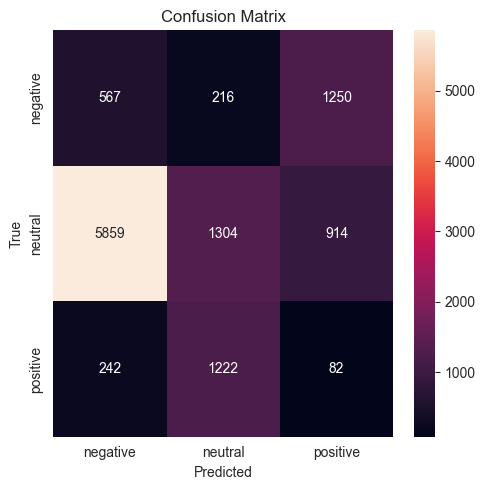

              precision    recall  f1-score   support

    negative     0.0365    0.0530    0.0432      1546
     neutral     0.4756    0.1614    0.2411      8077
    positive     0.0850    0.2789    0.1303      2033

    accuracy                         0.1676     11656
   macro avg     0.1990    0.1645    0.1382     11656
weighted avg     0.3492    0.1676    0.1955     11656



In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

true_col   = "Label"
pred_col   = "finbert_pred"
label_ids  = [2, 1, 0]
label_names = ["negative", "neutral", "positive"]

# ----- 1. 混淆矩阵 -----
cm = confusion_matrix(df[true_col], df[pred_col], labels=label_ids)

plt.figure(figsize=(5, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=label_names,
    yticklabels=label_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# ----- 2. 精确率 / 召回率 / F1 -----
report = classification_report(
    df[true_col],
    df[pred_col],
    target_names=label_names,
    digits=4
)
print(report)

# 若想保存报告或图像，取消以下示例：
# plt.savefig("confusion_matrix.png", dpi=300)
# with open("classification_report.txt", "w") as f:
#     f.write(report)


# TRAIN A LONG SHORT-TERM MEMORY (LSTM) NEURAL NETWORK

In [128]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import tensorflow as tf
from tensorflow import keras

In [129]:
inputs = tf.keras.Input(shape = (X_train.shape[1],))


x = tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size,
                              output_dim = 768,
                              )(inputs)

x = tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)


In [130]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [131]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 61)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 61, 768)        │    23,440,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 61, 64)         │       213,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3904)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        11,715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,665,859 (90.28 MB)

 Trainable params: 23,665,859 (90.28 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 32,
                    epochs = 3)

Epoch 1/3
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 122ms/step - accuracy: 0.6865 - loss: 0.8184 - val_accuracy: 0.8782 - val_loss: 0.4507
Epoch 2/3
219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.8960 - loss: 0.2919 - val_accuracy: 0.8516 - val_loss: 0.4844
Epoch 3/3
219/219 ━━━━━━━━━━━━━━━━━━━━ 29s 134ms/step - accuracy: 0.9755 - loss: 0.0817 - val_accuracy: 0.8405 - val_loss: 0.7391


In [134]:
model.save('lstm_model.keras')

In [135]:
print(type(model))  # 检查模型类型

<class 'keras.src.models.functional.Functional'>


# Evaluating

In [136]:
results = model.evaluate(X_test, y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7566 - loss: 0.9814


In [137]:
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 76.19%


In [138]:
from sklearn.metrics import f1_score, classification_report
y_pred_prob = model.predict(X_test)  
y_pred = y_pred_prob.argmax(axis=1)  
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"测试集上的 F1-Score: {f1:.4f}")
print("\n分类报告：")
print(classification_report(y_test, y_pred, target_names=["Positive", "Neutral", "Negative"]))

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
测试集上的 F1-Score: 0.7570

分类报告：
              precision    recall  f1-score   support

    Positive       0.55      0.48      0.51       348
     Neutral       0.83      0.88      0.85      1501
    Negative       0.65      0.61      0.63       482

    accuracy                           0.76      2331
   macro avg       0.68      0.65      0.67      2331
weighted avg       0.75      0.76      0.76      2331



In [139]:
predictions = model.predict(X_test)
predictions

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[3.8742023e-03, 9.9604893e-01, 7.6926714e-05],
       [8.4537834e-07, 9.9999893e-01, 1.8388697e-07],
       [1.6708318e-04, 5.2490039e-05, 9.9978048e-01],
       ...,
       [9.5193106e-04, 5.8042398e-04, 9.9846762e-01],
       [4.3049343e-03, 9.7272599e-01, 2.2969050e-02],
       [1.8945567e-01, 4.1707638e-01, 3.9346796e-01]], dtype=float32)

In [140]:
import numpy as np
y_predict = []
for i in predictions:
  y_predict.append(np.argmax(i))
y_predict

[1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


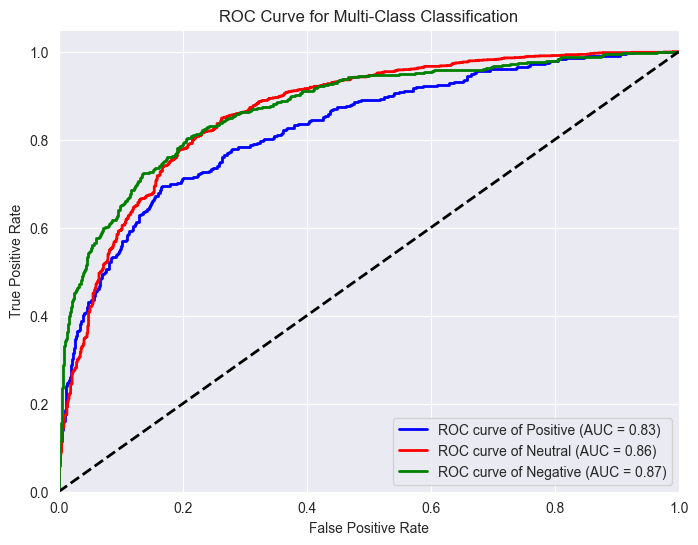

In [141]:
#lstm roc图
from sklearn.preprocessing import label_binarize

# 将真实标签二值化
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) 
n_classes = y_test_binarized.shape[1]  # 类别数
from sklearn.metrics import roc_curve, auc

# 初始化变量
fpr = dict()  # 假正率
tpr = dict()  # 真正率
roc_auc = dict()  # AUC 值

# 计算每个类别的 ROC 曲线和 AUC 值
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
import matplotlib.pyplot as plt

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # 每个类别的颜色
class_names = ['Positive', 'Neutral', 'Negative']  # 类别名称

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {class_name} (AUC = {roc_auc[i]:.2f})')

# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 设置图形属性
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [143]:
y_test

6993    1
6994    1
6995    2
6996    1
6997    1
       ..
9319    0
9320    1
9321    2
9322    2
9323    2
Name: Label, Length: 2331, dtype: int64

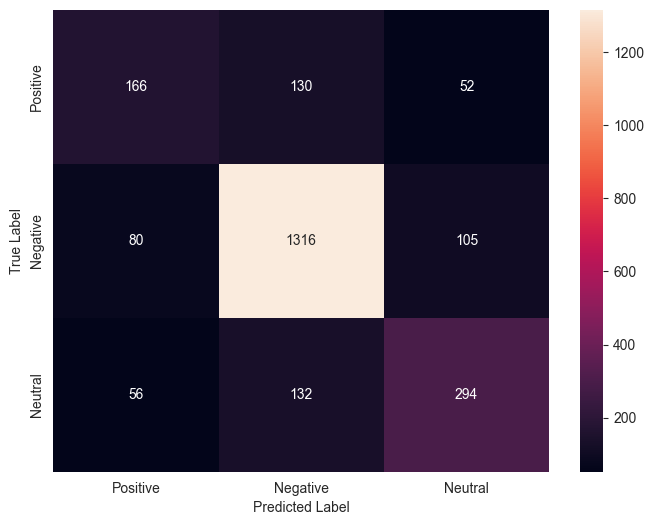

In [144]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=["Positive", "Negative", "Neutral"],
            yticklabels=["Positive", "Negative", "Neutral"])

plt.title("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

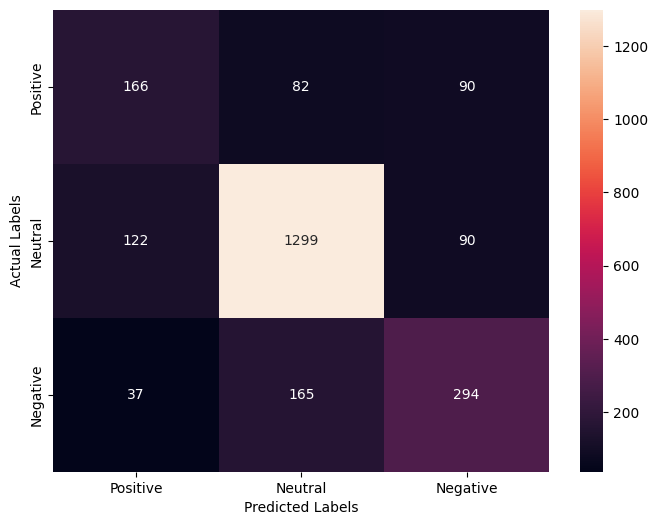

In [138]:
#lstm混淆矩阵
confusion_matrix = np.array([
    [166, 82, 90],  # 第一行：实际为 Positive（0）的分类结果
    [122, 1299, 90],  # 第二行：实际为 Negative（1）的分类结果
    [37, 165, 294]    # 第三行：实际为 Neutral（2）的分类结果
])
labels = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       348
           1       0.83      0.88      0.85      1501
           2       0.65      0.61      0.63       482

    accuracy                           0.76      2331
   macro avg       0.68      0.65      0.67      2331
weighted avg       0.75      0.76      0.76      2331

